This is a continuation of AQI project which contains a data set where, I will be focusing on finding the pattern of air quality index (my target variable) for a period of 5 years. 

Here I will be doing hierarchial clustering where I will be standardizing my data so that we will get appropriate results.

The link for the data sets are,
https://aqs.epa.gov/aqsweb/airdata/download_files.html#Raw

Daily AQI by County_2018, 2019, 2020, 2021, 2022

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
import statsmodels.formula.api as smf

import statsmodels.api as sm


In [3]:
file_names = ['daily_aqi_by_county_2018.csv', 'daily_aqi_by_county_2019.csv', 'daily_aqi_by_county_2020.csv', 'daily_aqi_by_county_2021.csv', 'daily_aqi_by_county_2022.csv']

dfs = []

for file_name in file_names:
    df = pd.read_csv(file_name)
    dfs.append(df)

cluster_all = pd.concat(dfs, ignore_index=True)

cluster_all.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,1/2/2018,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,1/5/2018,34,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,1/8/2018,15,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,1/11/2018,19,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,1/14/2018,25,Good,PM2.5,01-003-0010,1


In [4]:
cluster_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505880 entries, 0 to 1505879
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   State Name                 1505880 non-null  object
 1   county Name                1505880 non-null  object
 2   State Code                 1505880 non-null  int64 
 3   County Code                1505880 non-null  int64 
 4   Date                       1505880 non-null  object
 5   AQI                        1505880 non-null  int64 
 6   Category                   1505880 non-null  object
 7   Defining Parameter         1505880 non-null  object
 8   Defining Site              1505880 non-null  object
 9   Number of Sites Reporting  1505880 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 114.9+ MB


In [5]:
cluster_all.columns = cluster_all.columns.str.replace(' ', '_')

In [6]:
cluster_all['date_dt'] = pd.to_datetime( cluster_all['Date'] )

In [7]:
cluster_all['the_year'] = cluster_all.date_dt.dt.year

In [8]:
cluster_all['the_month'] = cluster_all.date_dt.dt.month

In [9]:
cluster_all

,State_Name,county_Name,State_Code,County_Code,Date,AQI,Category,Defining_Parameter,Defining_Site,Number_of_Sites_Reporting,date_dt,the_year,the_month
0,Alabama,Baldwin,1,3,1/2/2018,32,Good,PM2.5,01-003-0010,1,2018-01-02,2018,1
1,Alabama,Baldwin,1,3,1/5/2018,34,Good,PM2.5,01-003-0010,1,2018-01-05,2018,1
2,Alabama,Baldwin,1,3,1/8/2018,15,Good,PM2.5,01-003-0010,1,2018-01-08,2018,1
3,Alabama,Baldwin,1,3,1/11/2018,19,Good,PM2.5,01-003-0010,1,2018-01-11,2018,1
4,Alabama,Baldwin,1,3,1/14/2018,25,Good,PM2.5,01-003-0010,1,2018-01-14,2018,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505875,Wyoming,Weston,56,45,6/26/2022,38,Good,Ozone,56-045-0003,1,2022-06-26,2022,6
1505876,Wyoming,Weston,56,45,6/27/2022,44,Good,Ozone,56-045-0003,1,2022-06-27,2022,6
1505877,Wyoming,Weston,56,45,6/28/2022,43,Good,Ozone,56-045-0003,1,2022-06-28,2022,6
1505878,Wyoming,Weston,56,45,6/29/2022,44,Good,Ozone,56-045-0003,1,2022-06-29,2022,6


In [10]:
cluster_req = cluster_all.loc[ (cluster_all['Defining_Parameter'] == 'Ozone'), :].\
groupby(['State_Name', 'county_Name', 'Defining_Parameter', 'Defining_Site']).\
aggregate(num_rows = ('AQI', 'size'),
          num_reporting_sites = ('Number_of_Sites_Reporting', 'sum'),
          unique_reporting_sites = ('Number_of_Sites_Reporting', 'nunique'),
          num_unique_dates = ('Date', 'nunique'),
          min_date = ('date_dt', 'min'),
          max_date = ('date_dt', 'max'),
          start_year = ('the_year', 'min'),
          end_year = ('the_year', 'max')).copy()

cluster_req

num_rows  \
State_Name county_Name Defining_Parameter Defining_Site             
Alabama    Baldwin     Ozone              01-003-0010         967   
           Colbert     Ozone              01-033-1002         437   
           DeKalb      Ozone              01-049-9991        1523   
           Elmore      Ozone              01-051-0004        1005   
           Etowah      Ozone              01-055-0011         890   
...                                                           ...   
Wyoming    Teton       Ozone              56-039-0009         143   
                                          56-039-1011         939   
                                          56-039-1013           2   
           Uinta       Ozone              56-041-0101         939   
           Weston      Ozone              56-045-0003        1577   

                                                         num_reporting_sites  \
State_Name county_Name Defining_Parameter Defining_Site                        
Alabama    Baldwin     Ozone              01-003-0010                    967   
           Colbert     Ozone              01-033-1002                    437   
           DeKalb      Ozone              01-049-9991                   1870   
           Elmore      Ozone              01-051-0004                   1005   
           Etowah      Ozone              01-055-0011                   1208   
...                                                                      ...   
Wyoming    Teton       Ozone              56-039-0009                    607   
                                          56-039-1011                   3673   
                                          56-039-1013                      7   
           Uinta       Ozone              56-041-0101                   2775   
           Weston      Ozone              56-045-0003                   1577   

                                                         unique_reporting_sites  \
State_Name county_Name Defining_Parameter Defining_Site                           
Alabama    Baldwin     Ozone              01-003-0010                         1   
           Colbert     Ozone              01-033-1002                         1   
           DeKalb      Ozone              01-049-9991                         2   
           Elmore      Ozone              01-051-0004                         1   
           Etowah      Ozone              01-055-0011                         2   
...                                                                         ...   
Wyoming    Teton       Ozone              56-039-0009                         4   
                                          56-039-1011                         5   
                                          56-039-1013                         2   
           Uinta       Ozone              56-041-0101                         3   
           Weston      Ozone              56-045-0003                         1   

                                                         num_unique_dates  \
State_Name county_Name Defining_Parameter Defining_Site                     
Alabama    Baldwin     Ozone              01-003-0010                 967   
           Colbert     Ozone              01-033-1002                 437   
           DeKalb      Ozone              01-049-9991                1523   
           Elmore      Ozone              01-051-0004                1005   
           Etowah      Ozone              01-055-0011                 890   
...                                                                   ...   
Wyoming    Teton       Ozone              56-039-0009                 143   
                                          56-039-1011                 939   
                                          56-039-1013                   2   
           Uinta       Ozone              56-041-0101                 939   
           Weston      Ozone              56-045-0003                1577   

                                    

In [11]:
oz_cluster = cluster_req.reset_index().copy()

In [12]:
oz_cluster['year_diff'] = oz_cluster.end_year - oz_cluster.start_year

In [13]:
oz_cluster.year_diff.value_counts()

4    1129
0     144
3     142
2      92
1      88
Name: year_diff, dtype: int64

In [14]:
#all sites with max difference in years
oz_cluster_a = oz_cluster.loc[ oz_cluster.year_diff == oz_cluster.year_diff.max(), : ].reset_index(drop = True).copy()

In [15]:
oz_cluster_a

,State_Name,county_Name,Defining_Parameter,Defining_Site,num_rows,num_reporting_sites,unique_reporting_sites,num_unique_dates,min_date,max_date,start_year,end_year,year_diff
0,Alabama,Baldwin,Ozone,01-003-0010,967,967,1,967,2018-03-01,2022-06-30,2018,2022,4
1,Alabama,DeKalb,Ozone,01-049-9991,1523,1870,2,1523,2018-01-02,2022-08-31,2018,2022,4
2,Alabama,Elmore,Ozone,01-051-0004,1005,1005,1,1005,2018-03-21,2022-06-30,2018,2022,4
3,Alabama,Etowah,Ozone,01-055-0011,890,1208,2,890,2018-03-01,2022-06-30,2018,2022,4
4,Alabama,Jefferson,Ozone,01-073-0023,135,1206,4,135,2018-01-11,2022-06-24,2018,2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,Wyoming,Sweetwater,Ozone,56-037-0200,269,4364,16,269,2018-11-11,2022-06-30,2018,2022,4
1125,Wyoming,Sweetwater,Ozone,56-037-0300,829,13440,18,829,2018-01-01,2022-06-29,2018,2022,4
1126,Wyoming,Teton,Ozone,56-039-0008,482,1908,5,482,2018-01-10,2022-07-29,2018,2022,4
1127,Wyoming,Teton,Ozone,56-039-1011,939,3673,5,939,2018-01-01,2022-07-31,2018,2022,4


In [16]:
oz_cluster_a.Defining_Site.value_counts()

01-003-0010    1
38-057-0004    1
39-017-0020    1
39-017-0018    1
39-007-1001    1
              ..
18-127-0026    1
18-129-0003    1
18-145-0001    1
18-141-0010    1
56-045-0003    1
Name: Defining_Site, Length: 1129, dtype: int64

In [17]:
oz_cluster_b = oz_cluster_a.sort_values(by=['num_rows'], ascending = False).reset_index(drop = True).copy()

In [18]:
oz_cluster_c = oz_cluster_b.loc[(oz_cluster_b['num_rows'] == oz_cluster_b['num_reporting_sites'] ) & (oz_cluster_b['num_reporting_sites'] == oz_cluster_b['num_unique_dates'] ),:].reset_index(drop = True).copy()

In [19]:
oz_cluster_c

,State_Name,county_Name,Defining_Parameter,Defining_Site,num_rows,num_reporting_sites,unique_reporting_sites,num_unique_dates,min_date,max_date,start_year,end_year,year_diff
0,Indiana,Shelby,Ozone,18-145-0001,1729,1729,1,1729,2018-01-01,2022-09-30,2018,2022,4
1,Indiana,Brown,Ozone,18-013-0001,1719,1719,1,1719,2018-01-01,2022-09-30,2018,2022,4
2,Indiana,Carroll,Ozone,18-015-0002,1718,1718,1,1718,2018-01-01,2022-09-30,2018,2022,4
3,Louisiana,Pointe Coupee,Ozone,22-077-0001,1706,1706,1,1706,2018-01-01,2022-09-30,2018,2022,4
4,New Mexico,Valencia,Ozone,35-061-0008,1701,1701,1,1701,2018-01-01,2022-09-30,2018,2022,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,Oregon,Columbia,Ozone,41-009-0004,600,600,1,600,2018-05-01,2022-06-30,2018,2022,4
388,Georgia,Richmond,Ozone,13-245-0091,580,580,1,580,2018-03-02,2022-09-30,2018,2022,4
389,Oklahoma,Nowata,Ozone,40-105-0207,551,551,1,551,2018-01-10,2022-09-29,2018,2022,4
390,Alabama,Russell,Ozone,01-113-0003,515,515,1,515,2018-03-07,2022-06-30,2018,2022,4


In [20]:
oz_cluster_c.year_diff.value_counts()

4    392
Name: year_diff, dtype: int64

In [21]:
oz_cluster_c.min_date.value_counts()

2018-01-01    150
2018-03-01    137
2018-01-02     16
2018-03-02     13
2018-01-05      9
2018-01-12      6
2018-02-28      5
2018-01-03      5
2018-02-22      4
2018-01-06      3
2018-02-12      3
2018-02-23      3
2018-02-27      3
2018-05-18      3
2018-02-13      3
2018-03-07      2
2018-02-25      2
2018-01-11      2
2018-02-21      2
2018-02-19      2
2018-01-09      2
2018-01-10      2
2018-03-13      1
2018-06-30      1
2018-01-31      1
2018-02-16      1
2018-04-01      1
2018-01-07      1
2018-03-05      1
2018-03-04      1
2018-02-20      1
2018-02-24      1
2018-02-17      1
2018-06-29      1
2018-01-13      1
2018-03-21      1
2018-05-01      1
Name: min_date, dtype: int64

In [22]:
oz_cluster_d = oz_cluster_c.copy()

In [23]:
oz_cluster_c['State_Name'].unique()

array(['Indiana', 'Louisiana', 'New Mexico', 'Kentucky', 'Pennsylvania',
       'New York', 'Nebraska', 'Arizona', 'Connecticut', 'North Carolina',
       'Texas', 'Utah', 'Virginia', 'Tennessee', 'Michigan', 'Illinois',
       'Alaska', 'Arkansas', 'Missouri', 'Florida', 'Idaho', 'Oklahoma',
       'California', 'Kansas', 'Nevada', 'Mississippi', 'Wyoming',
       'New Jersey', 'Massachusetts', 'Georgia', 'South Dakota', 'Ohio',
       'West Virginia', 'North Dakota', 'Maryland', 'Montana', 'Colorado',
       'Wisconsin', 'Vermont', 'Iowa', 'Minnesota', 'New Hampshire',
       'Alabama', 'Maine', 'South Carolina', 'Rhode Island', 'Oregon'],
      dtype=object)

In [24]:
oz_cluster_c['State_Name'].nunique()

47

In [25]:
oz_cluster_c['Defining_Site'].unique()

array(['18-145-0001', '18-013-0001', '18-015-0002', '22-077-0001',
       '35-061-0008', '21-229-9991', '18-063-0004', '22-005-0004',
       '42-111-9991', '22-093-0002', '18-169-9991', '36-109-9991',
       '21-175-9991', '31-107-9991', '22-099-0001', '22-095-0002',
       '04-012-8000', '09-015-9991', '37-113-9991', '48-183-0001',
       '49-007-1003', '42-047-9991', '48-373-9991', '48-423-0007',
       '48-085-0005', '36-063-1006', '51-147-9991', '18-083-9991',
       '48-381-9991', '47-041-9991', '36-075-0003', '18-129-0003',
       '36-041-0005', '26-165-9991', '17-085-9991', '18-123-0009',
       '26-157-9991', '48-367-0081', '48-231-1006', '47-025-9991',
       '48-221-0001', '18-011-0001', '02-068-0003', '05-019-9991',
       '36-091-0004', '29-137-0001', '12-097-2002', '16-023-0101',
       '40-017-0101', '48-251-0003', '12-061-9991', '06-005-0002',
       '40-037-0144', '20-103-0003', '40-113-0226', '32-033-0101',
       '18-043-1004', '12-111-0013', '28-161-9991', '56-003-00

In [26]:
oz_cluster_c['Defining_Site'].nunique()

392

In [27]:
#Grouping cluster by State and county name:
oz_state = oz_cluster_c.groupby('State_Name')['county_Name']


In [28]:
oz_unique_state = oz_state.nunique()
oz_unique_state

State_Name
Alabama            7
Alaska             1
Arizona            2
Arkansas           2
California         6
Colorado           1
Connecticut        5
Florida           18
Georgia           14
Idaho              1
Illinois          14
Indiana           12
Iowa               5
Kansas             6
Kentucky          22
Louisiana         12
Maine              1
Maryland          10
Massachusetts      5
Michigan          19
Minnesota         10
Mississippi        8
Missouri          11
Montana            3
Nebraska           1
Nevada             3
New Hampshire      2
New Jersey         8
New Mexico         3
New York          14
North Carolina    21
North Dakota       8
Ohio              15
Oklahoma          11
Oregon             1
Pennsylvania      22
Rhode Island       1
South Carolina     5
South Dakota       4
Tennessee          8
Texas             17
Utah               5
Vermont            2
Virginia          18
West Virginia      7
Wisconsin         18
Wyoming            3
Na

In [29]:
#unique value of reporting sites
oz_cluster_c['unique_reporting_sites'].value_counts()

1    392
Name: unique_reporting_sites, dtype: int64

In [30]:
req_sites = ['18-145-0001', '18-013-0001', '18-015-0002', '22-077-0001',
       '35-061-0008', '21-229-9991', '18-063-0004', '22-005-0004',
       '42-111-9991', '22-093-0002', '18-169-9991', '36-109-9991',
       '21-175-9991', '31-107-9991', '22-099-0001', '22-095-0002',
       '04-012-8000', '09-015-9991', '37-113-9991', '48-183-0001',
       '49-007-1003', '42-047-9991', '48-373-9991', '48-423-0007',
       '48-085-0005', '36-063-1006', '51-147-9991', '18-083-9991',
       '48-381-9991', '47-041-9991', '36-075-0003', '18-129-0003',
       '36-041-0005', '26-165-9991', '17-085-9991', '18-123-0009',
       '26-157-9991', '48-367-0081', '48-231-1006', '47-025-9991',
       '48-221-0001', '18-011-0001', '02-068-0003', '05-019-9991',
       '36-091-0004', '29-137-0001', '12-097-2002', '16-023-0101',
       '40-017-0101', '48-251-0003', '12-061-9991', '06-005-0002',
       '40-037-0144', '20-103-0003', '40-113-0226', '32-033-0101',
       '18-043-1004', '12-111-0013', '28-161-9991', '56-003-0002',
       '36-027-0007', '34-027-3001', '36-013-0006', '06-109-0005',
       '12-069-0002', '12-077-9991', '25-001-0002', '17-023-0001',
       '36-079-0005', '51-113-0003', '32-001-0002', '56-045-0003',
       '13-231-9991', '25-007-0001', '35-049-0021', '48-397-0001',
       '46-033-0132', '39-047-9991', '46-093-0001', '12-091-0002',
       '49-021-0005', '21-221-9991', '54-021-9991', '38-007-0002',
       '48-469-0003', '12-035-0004', '36-045-0002', '22-073-0004',
       '24-023-0002', '42-073-0015', '12-055-0003', '30-083-0002',
       '08-035-0004', '56-019-0004', '18-055-0001', '42-055-0001',
       '38-053-0002', '55-003-0010', '36-117-3001', '42-017-0012',
       '38-013-0004', '09-005-0005', '30-071-0010', '37-031-9991',
       '42-033-4000', '48-043-0101', '36-087-0005', '46-071-0001',
       '38-065-0002', '36-119-2004', '55-041-0007', '36-101-0003',
       '42-079-1101', '51-179-0001', '35-025-0008', '42-089-0002',
       '37-159-0021', '51-153-0009', '36-067-1015', '49-045-0004',
       '20-195-0001', '38-025-0004', '50-003-0004', '32-510-0020',
       '21-061-0501', '48-309-1037', '46-011-0003', '17-097-1007',
       '42-063-0004', '38-101-0003', '12-003-0002', '49-005-0007',
       '49-011-0004', '51-107-1005', '30-075-0001', '34-019-0001',
       '12-117-1002', '25-015-4002', '19-017-0011', '19-085-0007',
       '42-117-4000', '13-085-0001', '13-055-0001', '13-097-0004',
       '55-027-0001', '37-027-0003', '40-097-9014', '13-247-0001',
       '34-011-0007', '28-081-0005', '28-075-0003', '34-025-0005',
       '37-003-0005', '48-257-0005', '27-139-0505', '17-001-0007',
       '48-349-1051', '37-033-0001', '24-003-1003', '39-109-0005',
       '37-145-0003', '39-027-1002', '13-261-1001', '51-013-0020',
       '33-005-0007', '37-199-0004', '37-157-0099', '37-109-0004',
       '37-077-0001', '39-083-0003', '39-167-0004', '17-117-0002',
       '38-017-1004', '13-073-0001', '22-103-0002', '40-043-0860',
       '37-117-0001', '39-041-0002', '39-007-1001', '37-107-0004',
       '39-097-0007', '04-027-8011', '39-173-0003', '26-113-0001',
       '26-121-0039', '37-075-0001', '26-063-0007', '25-023-0005',
       '26-021-0014', '26-019-0003', '40-001-9009', '34-023-0011',
       '26-027-0003', '37-179-0003', '26-105-0007', '39-055-0004',
       '13-213-0003', '34-015-0002', '48-339-0078', '18-067-0004',
       '26-037-0002', '29-003-0001', '29-049-0001', '29-027-0002',
       '29-186-0005', '29-019-0011', '29-113-0004', '29-157-0001',
       '17-049-1001', '47-187-0106', '01-117-0004', '21-185-0004',
       '24-013-0001', '24-021-0037', '06-009-0001', '51-085-0003',
       '26-153-0001', '51-197-0002', '51-061-0002', '21-089-0007',
       '47-089-0002', '26-125-0001', '21-113-0001', '21-029-0006',
       '21-213-0004', '50-021-0002', '47-001-0101', '51-033-0001',
       '42-059-0002', '54-025-0003', '24-009-0011', '24-017-0010',
       '55-105-0030', '55-061-0002', '55-055-0009', '55-039-0006',
       '24-029-0002', '39-003-0009', '55-021-0015', '55-101-0020',
       '42-015-0011', '47-189-0103', '24-043-0009', '39-135-1001',
       '26-005-0003', '13-067-0003', '55-073-0012', '51-163-0003',
       '55-071-0007', '55-029-0004', '06-021-0003', '51-165-0003',
       '39-025-0022', '20-191-0002', '54-061-0003', '24-015-0003',
       '54-069-0010', '25-011-2005', '37-081-0013', '13-127-0006',
       '01-051-0004', '21-043-0500', '37-129-0002', '12-113-0015',
       '51-041-0004', '12-129-0001', '23-013-0004', '51-036-0002',
       '27-049-5302', '37-147-0006', '54-107-1002', '45-031-0003',
       '37-065-0099', '40-121-0415', '39-165-0007', '22-055-0007',
       '54-003-0003', '21-091-0012', '42-005-0001', '42-095-0025',
       '33-013-1007', '42-049-0003', '45-003-0003', '01-003-0010',
       '05-035-0005', '12-085-0007', '06-081-1001', '22-015-0008',
       '45-051-0008', '38-015-0003', '09-007-9007', '17-083-0117',
       '09-013-1001', '24-031-3001', '42-091-0013', '12-021-0004',
       '42-129-0008', '26-139-0005', '42-077-0004', '29-037-0003',
       '54-029-0009', '55-125-0001', '51-650-0008', '20-133-0003',
       '42-029-0100', '19-137-0002', '19-147-1002', '17-157-0001',
       '39-103-0004', '27-171-3201', '26-065-0018', '51-003-0001',
       '21-199-0003', '48-203-0002', '19-177-0006', '42-051-0524',
       '37-063-0015', '27-109-5008', '27-095-3051', '44-003-0002',
       '22-057-0004', '42-013-0801', '17-161-3002', '26-091-0007',
       '40-135-9021', '34-041-0007', '12-005-0006', '21-013-0002',
       '26-147-0005', '27-083-4210', '27-145-3052', '26-101-0922',
       '47-165-0007', '29-099-0019', '09-011-0124', '37-101-0002',
       '27-017-7417', '20-177-0013', '40-027-0049', '45-037-0001',
       '55-087-0009', '55-111-0007', '55-063-0012', '27-035-3204',
       '17-111-0001', '22-121-0001', '51-069-0010', '13-151-0002',
       '29-039-0001', '17-065-0002', '51-161-1004', '45-025-0001',
       '21-047-0006', '01-119-0003', '47-105-0109', '26-077-0008',
       '55-035-0014', '17-113-2003', '28-059-0006', '06-075-0005',
       '12-023-0002', '22-063-0002', '21-037-3002', '34-013-0003',
       '27-005-2013', '17-115-0013', '40-085-0300', '12-059-0004',
       '42-021-0011', '21-059-0005', '21-093-0006', '55-133-0027',
       '28-011-0002', '21-195-0002', '28-045-0003', '01-103-0011',
       '21-145-1024', '28-033-0002', '20-209-0021', '28-047-0008',
       '21-067-0012', '17-163-0010', '21-193-0003', '13-059-0002',
       '13-135-0002', '21-227-0009', '12-073-0012', '41-009-0004',
       '13-245-0091', '40-105-0207', '01-113-0003', '01-101-1002']

In [31]:
new_cluster = cluster_all[cluster_all['Defining_Site'].isin(req_sites)].copy()

In [32]:
new_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590981 entries, 0 to 1505879
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   State_Name                 590981 non-null  object        
 1   county_Name                590981 non-null  object        
 2   State_Code                 590981 non-null  int64         
 3   County_Code                590981 non-null  int64         
 4   Date                       590981 non-null  object        
 5   AQI                        590981 non-null  int64         
 6   Category                   590981 non-null  object        
 7   Defining_Parameter         590981 non-null  object        
 8   Defining_Site              590981 non-null  object        
 9   Number_of_Sites_Reporting  590981 non-null  int64         
 10  date_dt                    590981 non-null  datetime64[ns]
 11  the_year                   590981 non-null  int64  

In [33]:
n_cl = new_cluster.loc[ new_cluster['Defining_Parameter'] == 'Ozone', :].reset_index(drop = True)

In [34]:
n_cl

,State_Name,county_Name,State_Code,County_Code,Date,AQI,Category,Defining_Parameter,Defining_Site,Number_of_Sites_Reporting,date_dt,the_year,the_month
0,Alabama,Baldwin,1,3,3/1/2018,30,Good,Ozone,01-003-0010,1,2018-03-01,2018,3
1,Alabama,Baldwin,1,3,3/2/2018,41,Good,Ozone,01-003-0010,1,2018-03-02,2018,3
2,Alabama,Baldwin,1,3,3/3/2018,47,Good,Ozone,01-003-0010,1,2018-03-03,2018,3
3,Alabama,Baldwin,1,3,3/4/2018,45,Good,Ozone,01-003-0010,1,2018-03-04,2018,3
4,Alabama,Baldwin,1,3,3/5/2018,49,Good,Ozone,01-003-0010,1,2018-03-05,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
460374,Wyoming,Weston,56,45,6/26/2022,38,Good,Ozone,56-045-0003,1,2022-06-26,2022,6
460375,Wyoming,Weston,56,45,6/27/2022,44,Good,Ozone,56-045-0003,1,2022-06-27,2022,6
460376,Wyoming,Weston,56,45,6/28/2022,43,Good,Ozone,56-045-0003,1,2022-06-28,2022,6
460377,Wyoming,Weston,56,45,6/29/2022,44,Good,Ozone,56-045-0003,1,2022-06-29,2022,6


In [35]:
from statsmodels.tsa.seasonal import STL

In [36]:
req_sites_use = oz_cluster_c['Defining_Site'].unique()

In [37]:
# create an empty list to store the results
results = []

# iterate over the defining sites list and filter the data for each site
for site in req_sites_use:
    filtered_data = n_cl[n_cl["Defining_Site"] == site].copy()
    
   

    #create a series:
    aqi_series = filtered_data.AQI.copy()
    aqi_series.index = filtered_data.date_dt
    ready_aqi = aqi_series.copy().resample('MS').mean()
    
    
    ready_stl = STL (ready_aqi).fit()
    
    #creating a data frame with columns and index
    df_col = pd.DataFrame({"observed": ready_stl.observed,
                          "trend": ready_stl.trend,
                          "seasonally_adjusted": ready_stl.observed - ready_stl.seasonal,
                          "detrend": ready_stl.observed - ready_stl.trend}, 
                         index = ready_aqi.index )
    df_col["Defining_site"] = site
    
    results.append(df_col)
    #
    



In [38]:
len(results)

392

In [39]:
results_df = pd.concat( results )

In [40]:
results_df

,observed,trend,seasonally_adjusted,detrend,Defining_site
date_dt,,,,,
2018-01-01,27.838710,37.349607,36.916240,-9.510897,18-145-0001
2018-02-01,28.892857,37.115164,37.685430,-8.222307,18-145-0001
2018-03-01,36.290323,36.886203,35.700092,-0.595881,18-145-0001
2018-04-01,43.233333,36.664069,36.690168,6.569265,18-145-0001
2018-05-01,57.129032,36.450684,41.020322,20.678349,18-145-0001
...,...,...,...,...,...
2022-02-01,NaN,NaN,NaN,NaN,01-101-1002
2022-03-01,43.285714,NaN,NaN,NaN,01-101-1002
2022-04-01,42.620690,NaN,NaN,NaN,01-101-1002


In [41]:
results_df_b = results_df.reset_index().copy()

In [42]:
results_df_b

,date_dt,observed,trend,seasonally_adjusted,detrend,Defining_site
0,2018-01-01,27.838710,37.349607,36.916240,-9.510897,18-145-0001
1,2018-02-01,28.892857,37.115164,37.685430,-8.222307,18-145-0001
2,2018-03-01,36.290323,36.886203,35.700092,-0.595881,18-145-0001
3,2018-04-01,43.233333,36.664069,36.690168,6.569265,18-145-0001
4,2018-05-01,57.129032,36.450684,41.020322,20.678349,18-145-0001
...,...,...,...,...,...,...
21342,2022-02-01,NaN,NaN,NaN,NaN,01-101-1002
21343,2022-03-01,43.285714,NaN,NaN,NaN,01-101-1002
21344,2022-04-01,42.620690,NaN,NaN,NaN,01-101-1002
21345,2022-05-01,41.896552,NaN,NaN,NaN,01-101-1002


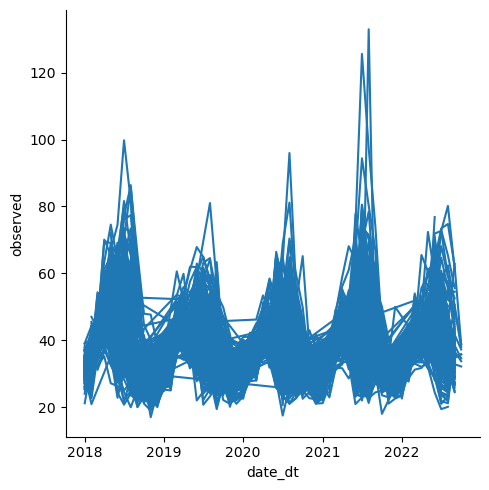

In [43]:
sns.relplot(data = results_df_b, x = "date_dt", y = "observed" , kind = "line", units = "Defining_site", estimator = None)

plt.show()

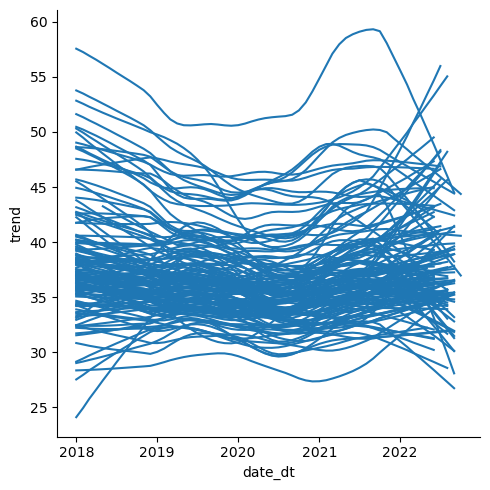

In [44]:
sns.relplot(data = results_df_b, x = "date_dt", y = "trend" , kind = "line", units = "Defining_site", estimator = None)

plt.show()

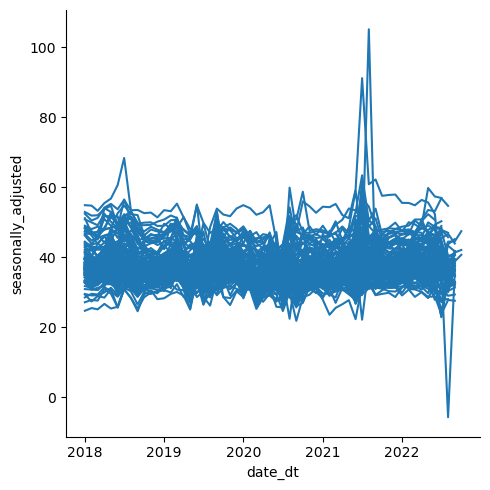

In [45]:
sns.relplot(data = results_df_b, x = "date_dt", y = "seasonally_adjusted" , kind = "line", units = "Defining_site", estimator = None)

plt.show()

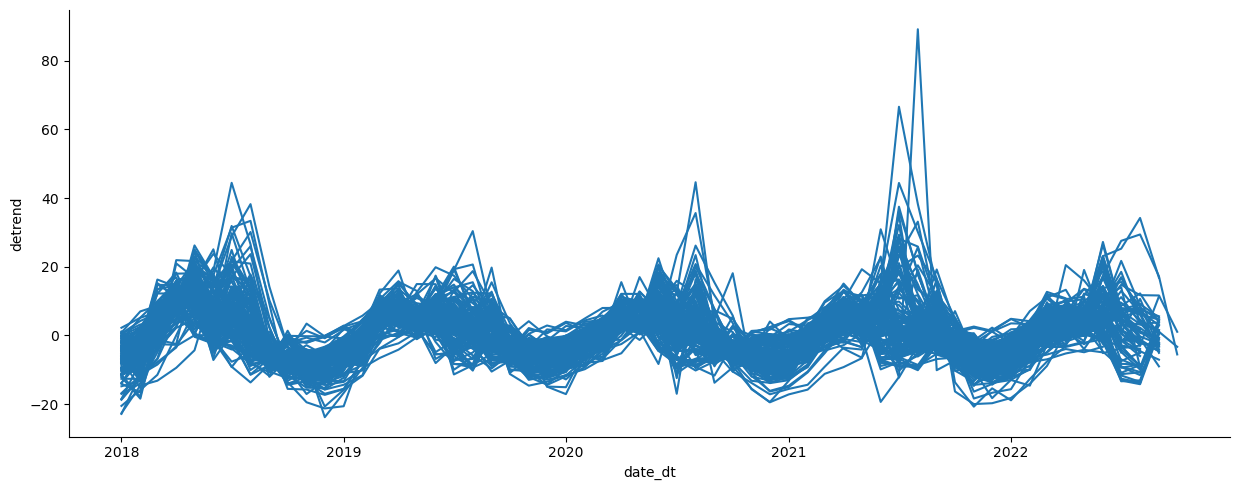

In [46]:
sns.relplot(data = results_df_b, x = "date_dt", y = "detrend" , kind = "line", units = "Defining_site", estimator = None,
            aspect=2.5)

plt.show()

In [47]:
results_df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21347 entries, 0 to 21346
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_dt              21347 non-null  datetime64[ns]
 1   observed             18133 non-null  float64       
 2   trend                7589 non-null   float64       
 3   seasonally_adjusted  7589 non-null   float64       
 4   detrend              7589 non-null   float64       
 5   Defining_site        21347 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1000.8+ KB


In [48]:
results_df_b["month"] = results_df_b.date_dt.dt.month 

In [49]:
results_df_b["year"] = results_df_b.date_dt.dt.year

In [50]:
results_df_b

,date_dt,observed,trend,seasonally_adjusted,detrend,Defining_site,month,year
0,2018-01-01,27.838710,37.349607,36.916240,-9.510897,18-145-0001,1,2018
1,2018-02-01,28.892857,37.115164,37.685430,-8.222307,18-145-0001,2,2018
2,2018-03-01,36.290323,36.886203,35.700092,-0.595881,18-145-0001,3,2018
3,2018-04-01,43.233333,36.664069,36.690168,6.569265,18-145-0001,4,2018
4,2018-05-01,57.129032,36.450684,41.020322,20.678349,18-145-0001,5,2018
...,...,...,...,...,...,...,...,...
21342,2022-02-01,NaN,NaN,NaN,NaN,01-101-1002,2,2022
21343,2022-03-01,43.285714,NaN,NaN,NaN,01-101-1002,3,2022
21344,2022-04-01,42.620690,NaN,NaN,NaN,01-101-1002,4,2022
21345,2022-05-01,41.896552,NaN,NaN,NaN,01-101-1002,5,2022


In [51]:
#Creating year_month column:
results_df_b["year_month"] = "Y" + results_df_b.year.astype("str") + "_" + "M" + results_df_b.month.astype("str").str.zfill(2)

In [52]:
results_df_b

,date_dt,observed,trend,seasonally_adjusted,detrend,Defining_site,month,year,year_month
0,2018-01-01,27.838710,37.349607,36.916240,-9.510897,18-145-0001,1,2018,Y2018_M01
1,2018-02-01,28.892857,37.115164,37.685430,-8.222307,18-145-0001,2,2018,Y2018_M02
2,2018-03-01,36.290323,36.886203,35.700092,-0.595881,18-145-0001,3,2018,Y2018_M03
3,2018-04-01,43.233333,36.664069,36.690168,6.569265,18-145-0001,4,2018,Y2018_M04
4,2018-05-01,57.129032,36.450684,41.020322,20.678349,18-145-0001,5,2018,Y2018_M05
...,...,...,...,...,...,...,...,...,...
21342,2022-02-01,NaN,NaN,NaN,NaN,01-101-1002,2,2022,Y2022_M02
21343,2022-03-01,43.285714,NaN,NaN,NaN,01-101-1002,3,2022,Y2022_M03
21344,2022-04-01,42.620690,NaN,NaN,NaN,01-101-1002,4,2022,Y2022_M04
21345,2022-05-01,41.896552,NaN,NaN,NaN,01-101-1002,5,2022,Y2022_M05


In [53]:
site_ftl_summary = results_df_b.groupby( "Defining_site").aggregate(start_date = ("date_dt", "min"), 
                                                end_date = ("date_dt", "max"), 
                                                num_values = ("trend", "count"), 
                                                num_dates = ("date_dt", "nunique")).reset_index().copy()

In [54]:
site_ftl_summary

,Defining_site,start_date,end_date,num_values,num_dates
0,01-003-0010,2018-03-01,2022-06-01,0,52
1,01-051-0004,2018-03-01,2022-06-01,0,52
2,01-101-1002,2018-03-01,2022-06-01,0,52
3,01-103-0011,2018-03-01,2022-06-01,0,52
4,01-113-0003,2018-03-01,2022-06-01,0,52
...,...,...,...,...,...
387,55-125-0001,2018-02-01,2022-09-01,0,56
388,55-133-0027,2018-02-01,2022-09-01,0,56
389,56-003-0002,2018-01-01,2022-06-01,54,54
390,56-019-0004,2018-05-01,2022-06-01,50,50


In [55]:
site_ftl_summary.num_dates.value_counts()

52    87
54    82
55    74
57    64
56    58
53    16
50     4
58     4
49     2
51     1
Name: num_dates, dtype: int64

In [56]:
site_ftl_summary.loc[(site_ftl_summary.num_dates == 52), :].min()

Defining_site            01-003-0010
start_date       2018-03-01 00:00:00
end_date         2022-06-01 00:00:00
num_values                         0
num_dates                         52
dtype: object

In [57]:
site_ftl_summary.loc[(site_ftl_summary.num_dates == 52), :].max()

Defining_site            54-107-1002
start_date       2018-06-01 00:00:00
end_date         2022-09-01 00:00:00
num_values                        52
num_dates                         52
dtype: object

In [58]:
site_cluster = site_ftl_summary.loc[(site_ftl_summary.start_date == "2018-03-01") & (site_ftl_summary.end_date == "2022-06-01"), "Defining_site"].copy()

In [59]:
site_cluster

0      01-003-0010
1      01-051-0004
2      01-101-1002
3      01-103-0011
4      01-113-0003
          ...     
366    54-025-0003
367    54-029-0009
368    54-061-0003
369    54-069-0010
370    54-107-1002
Name: Defining_site, Length: 86, dtype: object

In [60]:
results_df_c = results_df_b.loc[results_df_b.Defining_site.isin(site_cluster), :].copy()

In [61]:
results_df_c_2 = results_df_b.loc[ results_df_b.date_dt.between('2018-03-01', '2022-06-01'), : ].copy()

In [62]:
results_df_c_2

,date_dt,observed,trend,seasonally_adjusted,detrend,Defining_site,month,year,year_month
2,2018-03-01,36.290323,36.886203,35.700092,-0.595881,18-145-0001,3,2018,Y2018_M03
3,2018-04-01,43.233333,36.664069,36.690168,6.569265,18-145-0001,4,2018,Y2018_M04
4,2018-05-01,57.129032,36.450684,41.020322,20.678349,18-145-0001,5,2018,Y2018_M05
5,2018-06-01,52.533333,36.247712,38.496730,16.285622,18-145-0001,6,2018,Y2018_M06
6,2018-07-01,42.516129,36.054308,34.093075,6.461821,18-145-0001,7,2018,Y2018_M07
...,...,...,...,...,...,...,...,...,...
21342,2022-02-01,NaN,NaN,NaN,NaN,01-101-1002,2,2022,Y2022_M02
21343,2022-03-01,43.285714,NaN,NaN,NaN,01-101-1002,3,2022,Y2022_M03
21344,2022-04-01,42.620690,NaN,NaN,NaN,01-101-1002,4,2022,Y2022_M04
21345,2022-05-01,41.896552,NaN,NaN,NaN,01-101-1002,5,2022,Y2022_M05


In [63]:
results_df_c

,date_dt,observed,trend,seasonally_adjusted,detrend,Defining_site,month,year,year_month
6282,2018-03-01,39.258065,NaN,NaN,NaN,51-179-0001,3,2018,Y2018_M03
6283,2018-04-01,46.266667,NaN,NaN,NaN,51-179-0001,4,2018,Y2018_M04
6284,2018-05-01,43.258065,NaN,NaN,NaN,51-179-0001,5,2018,Y2018_M05
6285,2018-06-01,40.900000,NaN,NaN,NaN,51-179-0001,6,2018,Y2018_M06
6286,2018-07-01,41.741935,NaN,NaN,NaN,51-179-0001,7,2018,Y2018_M07
...,...,...,...,...,...,...,...,...,...
21342,2022-02-01,NaN,NaN,NaN,NaN,01-101-1002,2,2022,Y2022_M02
21343,2022-03-01,43.285714,NaN,NaN,NaN,01-101-1002,3,2022,Y2022_M03
21344,2022-04-01,42.620690,NaN,NaN,NaN,01-101-1002,4,2022,Y2022_M04
21345,2022-05-01,41.896552,NaN,NaN,NaN,01-101-1002,5,2022,Y2022_M05


In [64]:
#Creating detrend data frame:
detrend_df = results_df_c_2[["detrend", "Defining_site", "year_month"]].copy()

In [65]:
#Creating seasonaly adjusted data frame:
seasonal_df = results_df_c_2[["seasonally_adjusted", "Defining_site", "year_month"]].copy()

In [66]:
detrend_df

,detrend,Defining_site,year_month
2,-0.595881,18-145-0001,Y2018_M03
3,6.569265,18-145-0001,Y2018_M04
4,20.678349,18-145-0001,Y2018_M05
5,16.285622,18-145-0001,Y2018_M06
6,6.461821,18-145-0001,Y2018_M07
...,...,...,...
21342,NaN,01-101-1002,Y2022_M02
21343,NaN,01-101-1002,Y2022_M03
21344,NaN,01-101-1002,Y2022_M04
21345,NaN,01-101-1002,Y2022_M05


In [67]:
seasonal_df

,seasonally_adjusted,Defining_site,year_month
2,35.700092,18-145-0001,Y2018_M03
3,36.690168,18-145-0001,Y2018_M04
4,41.020322,18-145-0001,Y2018_M05
5,38.496730,18-145-0001,Y2018_M06
6,34.093075,18-145-0001,Y2018_M07
...,...,...,...
21342,NaN,01-101-1002,Y2022_M02
21343,NaN,01-101-1002,Y2022_M03
21344,NaN,01-101-1002,Y2022_M04
21345,NaN,01-101-1002,Y2022_M05


In [68]:
#Converting detrend long format into wide format data frame:
detrend_wf = detrend_df.pivot(index = "Defining_site", columns = "year_month", values = "detrend").reset_index().copy()

In [69]:
#Converting seasonal long format into wide format data frame:
seasonal_wf = seasonal_df.pivot(index = "Defining_site", columns = "year_month", values = "seasonally_adjusted").reset_index().copy()

In [70]:
detrend_wf.reset_index()

year_month,index,Defining_site,Y2018_M03,Y2018_M04,Y2018_M05,Y2018_M06,Y2018_M07,Y2018_M08,Y2018_M09,Y2018_M10,...,Y2021_M09,Y2021_M10,Y2021_M11,Y2021_M12,Y2022_M01,Y2022_M02,Y2022_M03,Y2022_M04,Y2022_M05,Y2022_M06
0,0,01-003-0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,01-051-0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,01-101-1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,01-103-0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,01-113-0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,387,55-125-0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,388,55-133-0027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,389,56-003-0002,-0.131068,6.129623,7.553894,8.384479,11.035756,10.553281,-0.672347,-5.822766,...,2.458998,-7.584389,-11.607701,-11.250231,-11.731648,-5.277741,-1.446016,1.582968,2.078355,1.110373
390,390,56-019-0004,NaN,NaN,3.402129,2.122867,6.735198,10.819268,-3.274767,-8.889730,...,1.658851,-9.407153,-11.436728,-9.437433,-9.417094,-6.694442,-5.593908,-3.978526,-4.913730,-3.313409


In [71]:
seasonal_wf

year_month,Defining_site,Y2018_M03,Y2018_M04,Y2018_M05,Y2018_M06,Y2018_M07,Y2018_M08,Y2018_M09,Y2018_M10,Y2018_M11,...,Y2021_M09,Y2021_M10,Y2021_M11,Y2021_M12,Y2022_M01,Y2022_M02,Y2022_M03,Y2022_M04,Y2022_M05,Y2022_M06
0,01-003-0010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-051-0004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-101-1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-103-0011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-113-0003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,55-125-0001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,55-133-0027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,56-003-0002,38.605581,40.003383,40.086127,38.977128,42.459858,40.879371,39.520898,37.988227,37.850737,...,39.840871,39.480110,40.503702,41.074473,39.670071,39.171221,40.759350,41.160303,41.297626,39.820009
390,56-019-0004,NaN,NaN,42.548219,41.614332,46.550050,44.405509,41.872659,40.370079,40.401484,...,44.336548,43.742289,44.064795,44.851575,44.783609,44.677424,45.368056,45.140964,45.210255,42.980528


In [72]:
detrend_wf_ready = detrend_wf.dropna()

In [73]:
detrend_wf_ready

year_month,Defining_site,Y2018_M03,Y2018_M04,Y2018_M05,Y2018_M06,Y2018_M07,Y2018_M08,Y2018_M09,Y2018_M10,Y2018_M11,...,Y2021_M09,Y2021_M10,Y2021_M11,Y2021_M12,Y2022_M01,Y2022_M02,Y2022_M03,Y2022_M04,Y2022_M05,Y2022_M06
7,02-068-0003,8.569667,10.933470,5.855154,-1.398034,-9.121347,-13.706946,-8.398889,-0.134427,-0.245349,...,-5.331247,-5.137031,-4.040992,1.499183,4.811511,4.111252,6.941352,10.408059,3.117273,-0.282911
8,04-012-8000,-4.510482,20.943629,16.699889,8.854543,6.846239,3.648235,-5.993422,-6.701800,-6.266114,...,-1.476546,-3.906691,-8.141550,-11.252856,-10.633495,-5.013605,-1.783108,9.487926,13.545973,11.641839
9,04-027-8011,-3.050820,21.899598,21.620203,17.706810,4.145180,-4.872780,-9.837010,-5.503298,-7.503696,...,1.199778,1.408200,-12.054925,-13.710064,-12.461490,-6.844449,-2.396587,20.448163,15.973741,9.080191
10,05-019-9991,8.322209,9.653850,9.189395,4.335396,5.892853,0.678893,-5.236754,-6.886772,-6.228731,...,5.590472,0.974449,-5.892567,-11.338338,-2.281785,-0.702770,7.324579,3.690650,1.747924,3.169031
11,05-035-0005,-0.393448,6.647505,15.433892,25.049237,6.432062,1.694674,0.328507,-9.136693,-12.982905,...,2.601255,-4.644058,-11.936311,-11.968117,-12.023895,-6.969641,1.386531,0.155569,2.567680,20.383185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,55-003-0010,9.893209,15.709722,9.895230,-1.899451,-3.365001,-6.235958,-6.838949,-9.876151,-5.885502,...,-3.703634,-8.701774,-5.239375,-3.834864,-0.091213,2.205366,6.743951,5.631845,6.306219,7.576114
373,55-027-0001,3.739587,14.103135,21.925369,4.877972,2.781272,-0.844942,-3.002196,-10.222322,-11.600968,...,0.669675,-6.163218,-10.263938,-7.163329,-3.344089,-2.164537,0.375725,2.073341,9.885923,14.321032
377,55-041-0007,7.029379,17.958781,18.096820,-1.593282,-2.939028,-5.581446,-5.675072,-10.465812,-7.624905,...,-1.702816,-5.578705,-4.740781,-3.593235,0.602582,2.899957,7.462375,2.897690,8.500861,5.010628
389,56-003-0002,-0.131068,6.129623,7.553894,8.384479,11.035756,10.553281,-0.672347,-5.822766,-9.387098,...,2.458998,-7.584389,-11.607701,-11.250231,-11.731648,-5.277741,-1.446016,1.582968,2.078355,1.110373


In [74]:
seasonal_wf_ready = seasonal_wf.dropna()

In [75]:
seasonal_wf_ready

year_month,Defining_site,Y2018_M03,Y2018_M04,Y2018_M05,Y2018_M06,Y2018_M07,Y2018_M08,Y2018_M09,Y2018_M10,Y2018_M11,...,Y2021_M09,Y2021_M10,Y2021_M11,Y2021_M12,Y2022_M01,Y2022_M02,Y2022_M03,Y2022_M04,Y2022_M05,Y2022_M06
7,02-068-0003,32.638526,34.892567,32.618048,33.973255,33.421361,32.826014,33.633121,34.763488,33.393495,...,32.724773,32.928187,31.612610,32.913994,33.053156,33.215303,34.089139,33.874971,34.311112,34.890963
8,04-012-8000,45.507289,53.958084,52.889826,49.719127,49.366896,49.904333,43.738074,44.334329,45.187535,...,47.052047,47.831700,48.207822,48.064511,47.640653,47.907915,47.127889,46.934530,43.450763,44.381495
9,04-027-8011,44.971893,51.660705,51.691351,51.653137,44.414447,46.510030,42.064018,44.835261,44.624142,...,48.778328,41.289538,47.292561,47.034301,46.412032,46.917711,45.561654,50.813457,46.325606,40.045449
10,05-019-9991,34.009677,33.065292,35.279069,34.080076,36.297300,31.679729,28.929950,30.959103,31.107760,...,34.940551,35.295794,33.181947,32.405590,34.486607,33.457599,35.381611,34.830799,34.473685,36.596001
11,05-035-0005,39.028407,39.866181,42.538904,43.802264,39.313051,41.499594,33.271416,39.162389,39.989189,...,41.885266,40.177933,39.465917,38.632036,40.270481,39.315746,41.734932,40.124801,41.476961,42.598627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,55-003-0010,34.559418,36.789320,36.338632,34.592965,33.889862,34.420047,35.600733,33.251472,33.287320,...,36.532389,33.835225,34.847970,34.851280,34.622628,35.649523,34.445151,35.647718,34.000276,30.630401
373,55-027-0001,36.364671,39.619898,43.340128,37.372400,36.061033,38.903309,38.568052,37.042482,36.259794,...,41.941389,39.443165,37.521727,38.923457,38.485826,37.461860,37.377827,36.898238,37.745263,32.179290
377,55-041-0007,35.898235,39.408331,40.922428,34.512210,35.569177,36.704894,37.586787,34.234292,33.959673,...,39.425657,35.504417,35.510779,35.917999,35.843038,35.815565,36.752266,35.420094,37.414195,33.628783
389,56-003-0002,38.605581,40.003383,40.086127,38.977128,42.459858,40.879371,39.520898,37.988227,37.850737,...,39.840871,39.480110,40.503702,41.074473,39.670071,39.171221,40.759350,41.160303,41.297626,39.820009


In [76]:
detrend_wf_values = detrend_wf_ready.drop(columns=['Defining_site'], axis=1).copy()

In [77]:
detrend_wf_values

year_month,Y2018_M03,Y2018_M04,Y2018_M05,Y2018_M06,Y2018_M07,Y2018_M08,Y2018_M09,Y2018_M10,Y2018_M11,Y2018_M12,...,Y2021_M09,Y2021_M10,Y2021_M11,Y2021_M12,Y2022_M01,Y2022_M02,Y2022_M03,Y2022_M04,Y2022_M05,Y2022_M06
7,8.569667,10.933470,5.855154,-1.398034,-9.121347,-13.706946,-8.398889,-0.134427,-0.245349,-0.299982,...,-5.331247,-5.137031,-4.040992,1.499183,4.811511,4.111252,6.941352,10.408059,3.117273,-0.282911
8,-4.510482,20.943629,16.699889,8.854543,6.846239,3.648235,-5.993422,-6.701800,-6.266114,-12.927817,...,-1.476546,-3.906691,-8.141550,-11.252856,-10.633495,-5.013605,-1.783108,9.487926,13.545973,11.641839
9,-3.050820,21.899598,21.620203,17.706810,4.145180,-4.872780,-9.837010,-5.503298,-7.503696,-13.861187,...,1.199778,1.408200,-12.054925,-13.710064,-12.461490,-6.844449,-2.396587,20.448163,15.973741,9.080191
10,8.322209,9.653850,9.189395,4.335396,5.892853,0.678893,-5.236754,-6.886772,-6.228731,-7.517141,...,5.590472,0.974449,-5.892567,-11.338338,-2.281785,-0.702770,7.324579,3.690650,1.747924,3.169031
11,-0.393448,6.647505,15.433892,25.049237,6.432062,1.694674,0.328507,-9.136693,-12.982905,-12.352765,...,2.601255,-4.644058,-11.936311,-11.968117,-12.023895,-6.969641,1.386531,0.155569,2.567680,20.383185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,9.893209,15.709722,9.895230,-1.899451,-3.365001,-6.235958,-6.838949,-9.876151,-5.885502,-3.608504,...,-3.703634,-8.701774,-5.239375,-3.834864,-0.091213,2.205366,6.743951,5.631845,6.306219,7.576114
373,3.739587,14.103135,21.925369,4.877972,2.781272,-0.844942,-3.002196,-10.222322,-11.600968,-9.471727,...,0.669675,-6.163218,-10.263938,-7.163329,-3.344089,-2.164537,0.375725,2.073341,9.885923,14.321032
377,7.029379,17.958781,18.096820,-1.593282,-2.939028,-5.581446,-5.675072,-10.465812,-7.624905,-6.121455,...,-1.702816,-5.578705,-4.740781,-3.593235,0.602582,2.899957,7.462375,2.897690,8.500861,5.010628
389,-0.131068,6.129623,7.553894,8.384479,11.035756,10.553281,-0.672347,-5.822766,-9.387098,-11.046021,...,2.458998,-7.584389,-11.607701,-11.250231,-11.731648,-5.277741,-1.446016,1.582968,2.078355,1.110373


In [78]:
seasonal_wf_values = seasonal_wf_ready.drop(columns=['Defining_site'], axis=1).copy()

In [79]:
seasonal_wf_values

year_month,Y2018_M03,Y2018_M04,Y2018_M05,Y2018_M06,Y2018_M07,Y2018_M08,Y2018_M09,Y2018_M10,Y2018_M11,Y2018_M12,...,Y2021_M09,Y2021_M10,Y2021_M11,Y2021_M12,Y2022_M01,Y2022_M02,Y2022_M03,Y2022_M04,Y2022_M05,Y2022_M06
7,32.638526,34.892567,32.618048,33.973255,33.421361,32.826014,33.633121,34.763488,33.393495,33.125827,...,32.724773,32.928187,31.612610,32.913994,33.053156,33.215303,34.089139,33.874971,34.311112,34.890963
8,45.507289,53.958084,52.889826,49.719127,49.366896,49.904333,43.738074,44.334329,45.187535,45.472491,...,47.052047,47.831700,48.207822,48.064511,47.640653,47.907915,47.127889,46.934530,43.450763,44.381495
9,44.971893,51.660705,51.691351,51.653137,44.414447,46.510030,42.064018,44.835261,44.624142,44.759782,...,48.778328,41.289538,47.292561,47.034301,46.412032,46.917711,45.561654,50.813457,46.325606,40.045449
10,34.009677,33.065292,35.279069,34.080076,36.297300,31.679729,28.929950,30.959103,31.107760,30.519615,...,34.940551,35.295794,33.181947,32.405590,34.486607,33.457599,35.381611,34.830799,34.473685,36.596001
11,39.028407,39.866181,42.538904,43.802264,39.313051,41.499594,33.271416,39.162389,39.989189,39.764144,...,41.885266,40.177933,39.465917,38.632036,40.270481,39.315746,41.734932,40.124801,41.476961,42.598627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,34.559418,36.789320,36.338632,34.592965,33.889862,34.420047,35.600733,33.251472,33.287320,32.923456,...,36.532389,33.835225,34.847970,34.851280,34.622628,35.649523,34.445151,35.647718,34.000276,30.630401
373,36.364671,39.619898,43.340128,37.372400,36.061033,38.903309,38.568052,37.042482,36.259794,36.282064,...,41.941389,39.443165,37.521727,38.923457,38.485826,37.461860,37.377827,36.898238,37.745263,32.179290
377,35.898235,39.408331,40.922428,34.512210,35.569177,36.704894,37.586787,34.234292,33.959673,33.919492,...,39.425657,35.504417,35.510779,35.917999,35.843038,35.815565,36.752266,35.420094,37.414195,33.628783
389,38.605581,40.003383,40.086127,38.977128,42.459858,40.879371,39.520898,37.988227,37.850737,37.104014,...,39.840871,39.480110,40.503702,41.074473,39.670071,39.171221,40.759350,41.160303,41.297626,39.820009


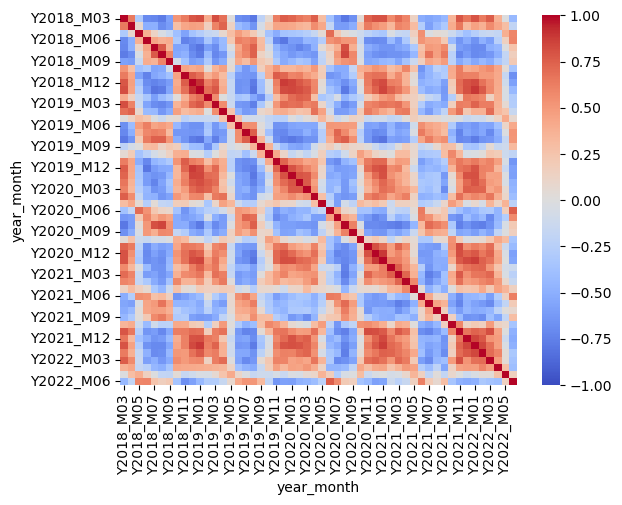

In [80]:
#Generating heatmap for detrend df:
sns.heatmap( data = detrend_wf_values.corr(),
            vmin=-1, vmax=1, center=0, cmap='coolwarm')

plt.show()

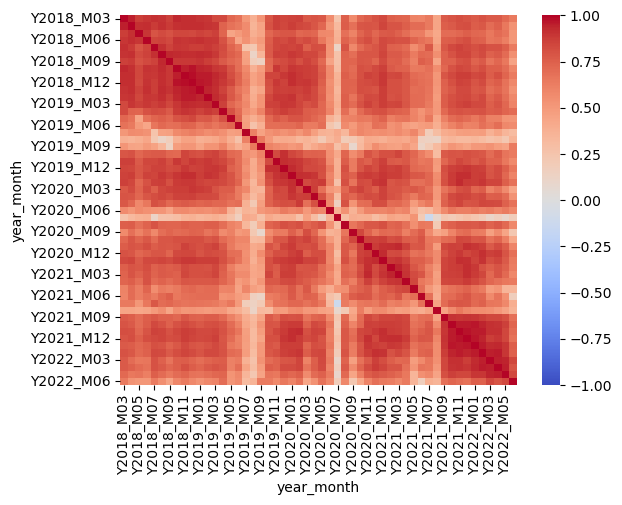

In [81]:
##Generating heatmap for seasonal df:
sns.heatmap( data = seasonal_wf_values.corr(),
            vmin=-1, vmax=1, center=0, cmap='coolwarm')

plt.show()

### Creating PCA

Standardazing the data

In [82]:
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [83]:
#Standardizing the data frame:
pca_dtrend = StandardScaler().fit_transform( detrend_wf_values )

In [84]:
pca_dtrend.shape

(132, 52)

In [85]:
pca_seasonal = StandardScaler().fit_transform( seasonal_wf_values )

In [86]:
pca_seasonal.shape

(132, 52)

In [87]:
#Applying pca:
pca_object = PCA()

In [88]:
type( pca_object )

sklearn.decomposition._pca.PCA

In [89]:
#For detrend pca, fitting the object
pca_object.fit( pca_dtrend )

PCA()

In [90]:
#For seasonal pca, fitting the object
pca_object.fit( pca_seasonal )

PCA()

In [91]:
pca_df = pca_object.transform( pca_dtrend )

In [92]:
pca_df.shape

(132, 52)

In [93]:
type( pca_df )

numpy.ndarray

In [94]:
pca_seasonal_df = pca_object.transform( pca_seasonal )

In [95]:
pca_seasonal_df.shape

(132, 52)

In [96]:
type( pca_seasonal_df )

numpy.ndarray

In [97]:
pc_names = ['pc_'+str(d).zfill(2) for d in range(1, (pca_df.shape[1]+1))]

In [98]:
pc_names

['pc_01',
 'pc_02',
 'pc_03',
 'pc_04',
 'pc_05',
 'pc_06',
 'pc_07',
 'pc_08',
 'pc_09',
 'pc_10',
 'pc_11',
 'pc_12',
 'pc_13',
 'pc_14',
 'pc_15',
 'pc_16',
 'pc_17',
 'pc_18',
 'pc_19',
 'pc_20',
 'pc_21',
 'pc_22',
 'pc_23',
 'pc_24',
 'pc_25',
 'pc_26',
 'pc_27',
 'pc_28',
 'pc_29',
 'pc_30',
 'pc_31',
 'pc_32',
 'pc_33',
 'pc_34',
 'pc_35',
 'pc_36',
 'pc_37',
 'pc_38',
 'pc_39',
 'pc_40',
 'pc_41',
 'pc_42',
 'pc_43',
 'pc_44',
 'pc_45',
 'pc_46',
 'pc_47',
 'pc_48',
 'pc_49',
 'pc_50',
 'pc_51',
 'pc_52']

In [99]:
pc_seasonal_names = ['pc_s_'+str(d).zfill(2) for d in range(1, (pca_seasonal_df.shape[1]+1))]

In [100]:
pc_seasonal_names

['pc_s_01',
 'pc_s_02',
 'pc_s_03',
 'pc_s_04',
 'pc_s_05',
 'pc_s_06',
 'pc_s_07',
 'pc_s_08',
 'pc_s_09',
 'pc_s_10',
 'pc_s_11',
 'pc_s_12',
 'pc_s_13',
 'pc_s_14',
 'pc_s_15',
 'pc_s_16',
 'pc_s_17',
 'pc_s_18',
 'pc_s_19',
 'pc_s_20',
 'pc_s_21',
 'pc_s_22',
 'pc_s_23',
 'pc_s_24',
 'pc_s_25',
 'pc_s_26',
 'pc_s_27',
 'pc_s_28',
 'pc_s_29',
 'pc_s_30',
 'pc_s_31',
 'pc_s_32',
 'pc_s_33',
 'pc_s_34',
 'pc_s_35',
 'pc_s_36',
 'pc_s_37',
 'pc_s_38',
 'pc_s_39',
 'pc_s_40',
 'pc_s_41',
 'pc_s_42',
 'pc_s_43',
 'pc_s_44',
 'pc_s_45',
 'pc_s_46',
 'pc_s_47',
 'pc_s_48',
 'pc_s_49',
 'pc_s_50',
 'pc_s_51',
 'pc_s_52']

In [101]:
pca_df_a = pd.DataFrame( pca_df, columns=pc_names )

In [102]:
pca_df_a

,pc_01,pc_02,pc_03,pc_04,pc_05,pc_06,pc_07,pc_08,pc_09,pc_10,...,pc_43,pc_44,pc_45,pc_46,pc_47,pc_48,pc_49,pc_50,pc_51,pc_52
0,3.860094,0.384516,-1.548428,0.567999,0.669564,-0.489753,-0.028016,-0.601004,0.527441,-0.651721,...,4.056633,-1.497496,-1.144759,-2.642907,0.369904,-0.691489,-0.881207,-0.931041,0.577571,-0.232308
1,0.298528,-0.642566,-0.812071,0.167152,-0.059758,-1.246429,-0.262043,0.307582,0.401831,1.521628,...,-3.418634,1.642802,0.202868,0.411114,-2.816950,-1.173627,-1.434193,1.088124,2.161314,0.784322
2,0.655311,-0.619202,-0.795237,0.538130,0.669274,-0.293667,-0.793822,2.744875,-0.097026,1.710346,...,-3.441168,2.419001,-0.018382,0.921616,-3.801503,-0.367302,-1.033209,-0.575013,2.414236,0.782791
3,0.943339,0.667905,0.298381,-0.012533,-0.045774,-0.823531,1.251693,-0.127381,-0.069570,0.960758,...,1.381614,-0.521522,-1.713119,-0.983740,1.174623,0.238866,-0.738866,0.173302,-0.233636,0.419075
4,-2.209984,-0.187120,2.216946,-0.690913,-0.399555,1.849653,0.043421,-0.245346,-0.199750,0.307429,...,-2.384093,1.465996,2.470883,2.490494,0.047276,1.290988,1.612762,-0.719307,-1.430114,0.221657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,1.931086,0.325736,-1.223472,0.120514,0.069324,-0.004347,-0.564301,0.529829,0.514564,0.016117,...,1.781165,-2.078564,-0.507915,-1.376440,1.245665,-0.003989,-0.002473,0.749640,0.259717,0.234809
128,0.075981,0.137845,-0.134617,0.119455,-1.105212,1.147807,-0.737287,0.986682,0.450032,-0.525566,...,-0.688227,-1.037704,1.613236,1.372984,0.150626,-0.322399,0.463922,0.738482,0.556655,-0.329875
129,2.203861,0.804866,-1.029229,0.462903,-0.860708,0.576291,-0.770670,0.467811,0.672269,-0.183253,...,2.187255,-1.195172,-0.281171,-0.663711,1.044614,-0.427178,-0.045081,1.206066,1.044866,0.165206
130,-2.030488,-1.294565,-1.955191,-1.033365,0.754345,0.125738,-0.270638,-0.711928,-0.923959,-0.852354,...,-0.108308,0.694822,0.560301,0.451951,0.144318,-0.547697,0.357386,-0.310895,-0.607921,0.144808


In [103]:
pca_seasonal_df_a = pd.DataFrame( pca_seasonal_df, columns=pc_seasonal_names )

In [104]:
pca_seasonal_df_a

,pc_s_01,pc_s_02,pc_s_03,pc_s_04,pc_s_05,pc_s_06,pc_s_07,pc_s_08,pc_s_09,pc_s_10,...,pc_s_43,pc_s_44,pc_s_45,pc_s_46,pc_s_47,pc_s_48,pc_s_49,pc_s_50,pc_s_51,pc_s_52
0,-6.055441,-0.781080,-0.961718,-0.574434,0.598091,-0.535888,-0.317174,0.228136,-0.219578,-0.973021,...,0.000248,0.000116,-0.000027,0.000002,-0.000012,-0.000004,-3.259147e-06,1.127071e-06,-3.223287e-07,-3.543887e-08
1,14.301631,-2.131176,-0.239451,2.374068,-0.411590,-0.605619,-0.111344,0.223175,0.331754,1.658364,...,-0.000954,0.000183,-0.000059,-0.000035,0.000014,0.000008,-1.375853e-06,9.030517e-07,-2.628866e-07,-3.538509e-08
2,13.671563,-3.197763,0.193245,2.644363,0.889390,0.102309,-0.663991,2.262027,-0.510790,1.864569,...,-0.000807,-0.000148,0.000077,0.000016,-0.000047,-0.000008,-1.969549e-06,-1.727957e-06,-1.575624e-06,-6.815727e-08
3,-7.406133,1.802289,-0.508208,-0.489864,0.219961,-0.875822,1.775219,0.375529,0.683355,0.955431,...,-0.001266,-0.000375,-0.000084,0.000036,0.000032,-0.000028,-5.698946e-06,-2.068554e-06,7.563646e-07,-2.182111e-08
4,3.583845,-0.493207,2.890087,0.417047,-0.246797,1.422096,0.383214,-0.467401,-0.225218,0.128418,...,-0.000694,-0.000024,0.000045,0.000024,0.000040,-0.000002,6.679241e-06,2.875316e-08,-5.515785e-07,-1.368432e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,-5.555703,-0.353755,-1.925168,0.115748,0.306711,0.097346,0.437956,0.977941,0.408644,-0.025494,...,0.000225,-0.000237,-0.000025,0.000052,-0.000005,-0.000007,2.230789e-06,-1.916959e-06,-3.765700e-08,6.274350e-08
128,0.330372,-0.930824,-0.620771,1.502877,-0.671860,1.399312,0.035299,0.505935,-0.079281,-0.082031,...,0.000107,-0.000257,-0.000086,0.000027,0.000012,0.000007,4.360716e-06,9.184024e-07,-2.576188e-07,-3.668276e-08
129,-3.733338,0.081737,-1.327142,0.397606,-1.145438,1.082220,-0.599722,0.771986,0.270826,-0.213012,...,0.000306,0.000237,-0.000050,0.000040,0.000011,-0.000003,1.035937e-06,-1.467116e-06,2.893601e-07,3.980460e-08
130,1.975209,1.028840,-2.349283,0.879348,0.142839,-0.066413,-0.016079,-0.204753,-0.231400,-0.388282,...,0.000036,0.000062,-0.000023,0.000018,0.000004,0.000007,4.645576e-07,1.118322e-06,2.010454e-08,-2.857689e-08


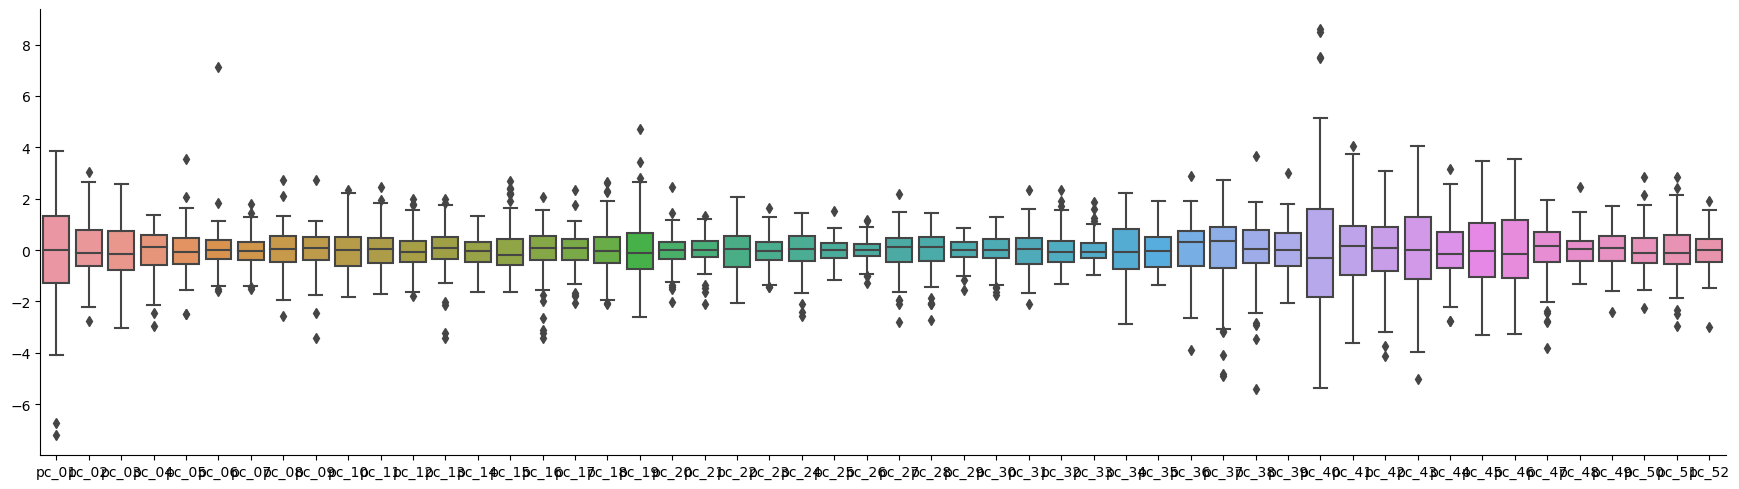

In [105]:
sns.catplot(data = pca_df_a, kind='box', aspect=3.5)

plt.show()

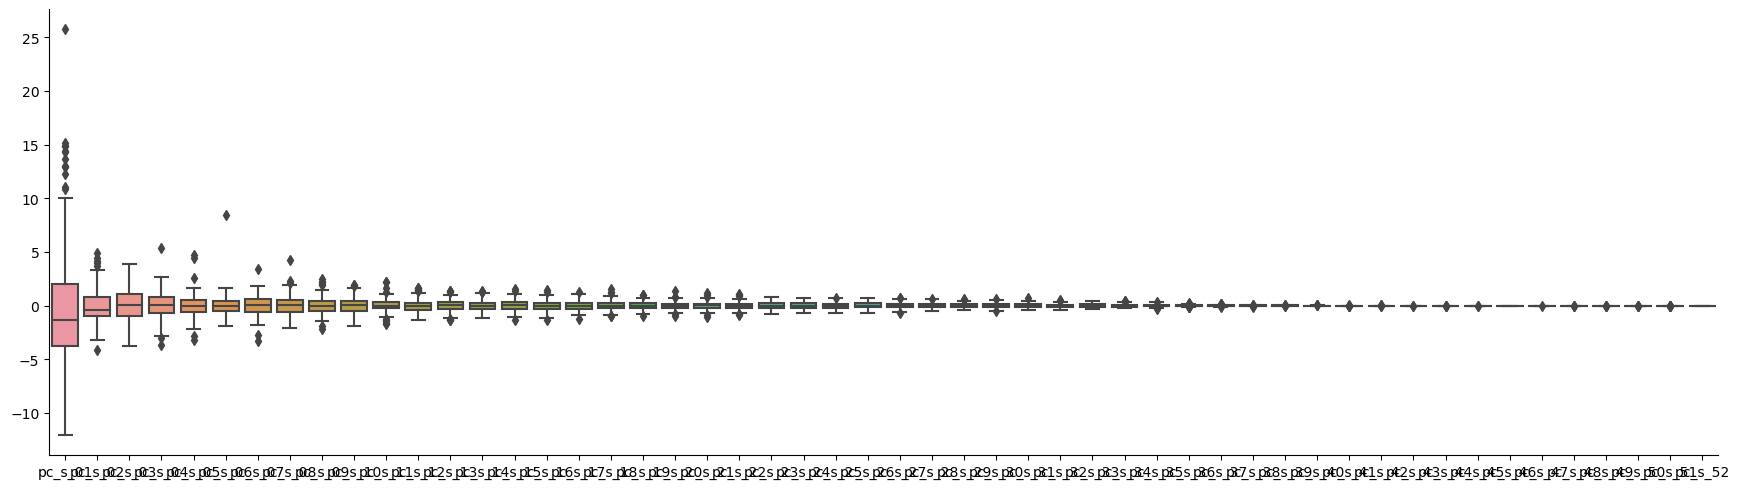

In [106]:
sns.catplot(data = pca_seasonal_df_a, kind='box', aspect=3.5)

plt.show()

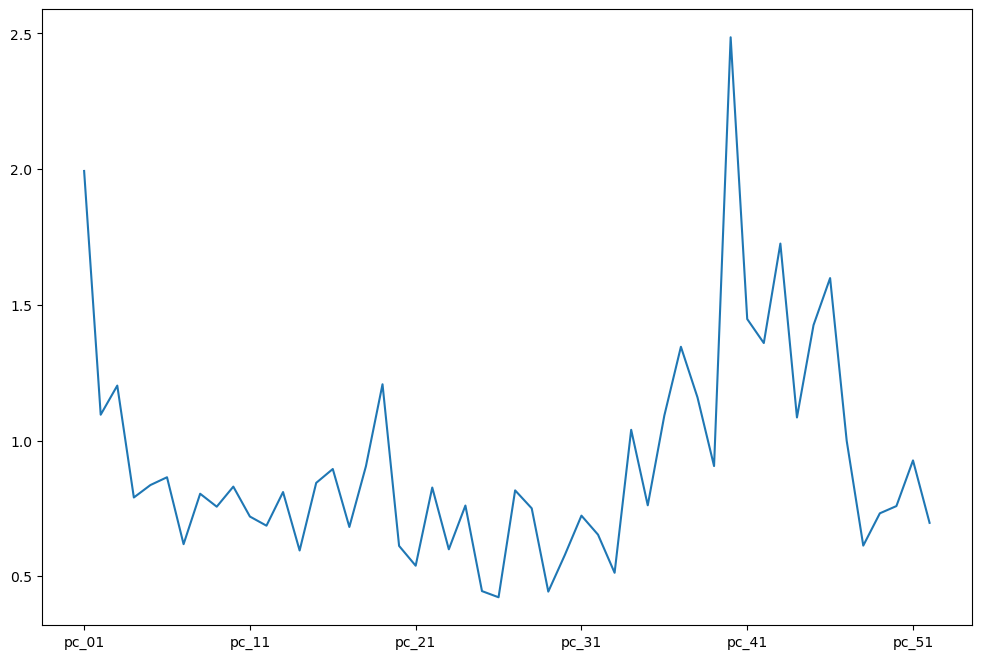

In [107]:
fig, ax = plt.subplots(figsize=(12, 8))

pca_df_a.describe().loc['std'].plot(ax=ax)

plt.show()



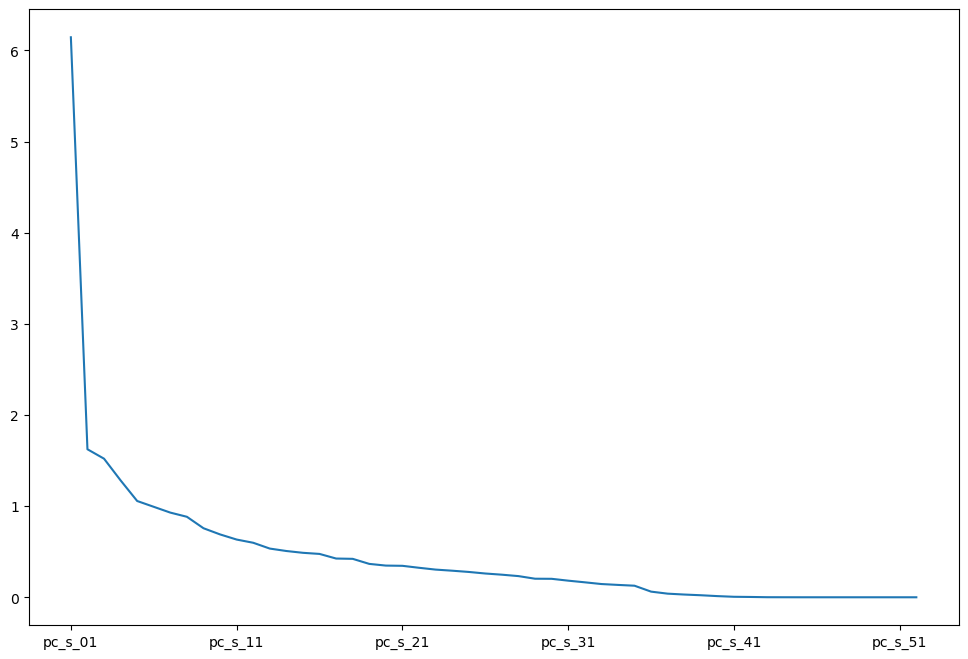

In [108]:
fig, ax = plt.subplots(figsize=(12, 8))


pca_seasonal_df_a.describe().loc['std'].plot(ax=ax)

plt.show()


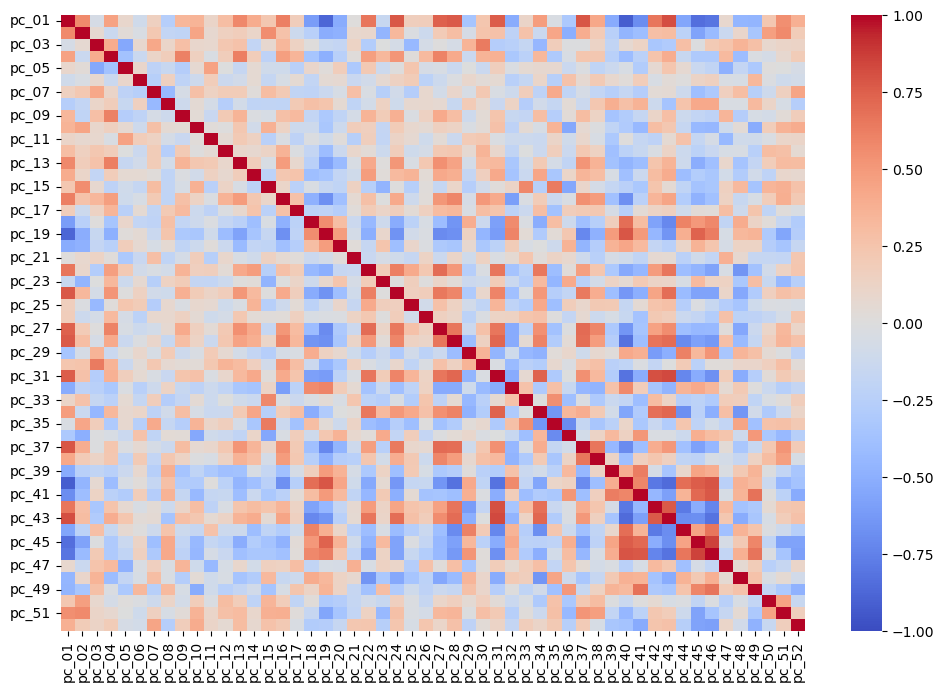

In [109]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap( data = pca_df_a.corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            ax=ax)

plt.show()

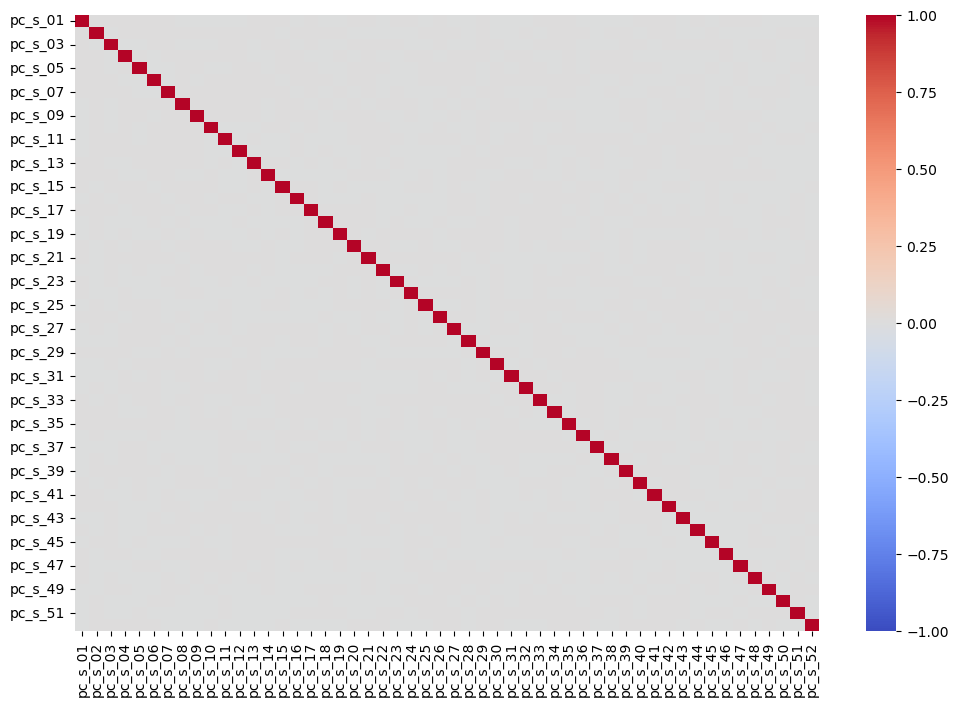

In [110]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap( data = pca_seasonal_df_a.corr(),
            vmin=-1, vmax=1, center = 0,
            cmap='coolwarm',
            ax=ax)

plt.show()

## Cluster

In [111]:
from sklearn.cluster import KMeans

In [112]:
cluster_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( pca_dtrend )

In [113]:
pca_df_a['k2'] = pd.Series( cluster_2, index=pca_df_a.index )

pca_df_a['k2'] = pca_df_a.k2.astype('category')

In [114]:
pca_df_a.k2.value_counts()

0    73
1    59
Name: k2, dtype: int64

In [115]:
cluster_seasonal_2 = KMeans(n_clusters=2, random_state=121, n_init=25, max_iter=500).fit_predict( pca_seasonal )

In [116]:
pca_seasonal_df_a['k2'] = pd.Series( cluster_seasonal_2, index=pca_seasonal_df_a.index )

pca_seasonal_df_a['k2'] = pca_seasonal_df_a.k2.astype('category')

In [117]:
pca_seasonal_df_a.k2.value_counts()

0    109
1     23
Name: k2, dtype: int64

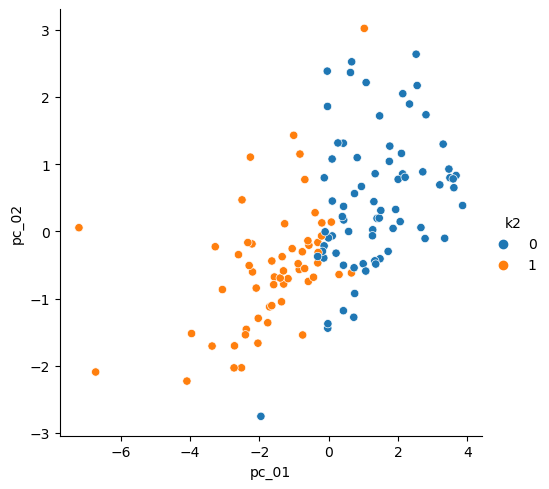

In [118]:
sns.relplot(data = pca_df_a, x='pc_01', y='pc_02', hue='k2')

plt.show()

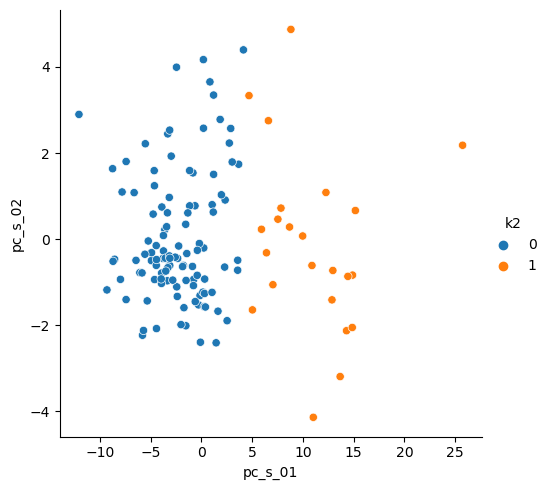

In [119]:
sns.relplot(data = pca_seasonal_df_a, x='pc_s_01', y='pc_s_02', hue='k2')

plt.show()

In [120]:
#identifying the optimal number of clusters for detrend
tots_within = []

K = range(1, 31)

for k in K:
    km = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit( pca_dtrend )
    tots_within.append( km.inertia_ )

C:\Users\Bhava\anaconda3\envs\cmpinf2120\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [121]:
#identifying the optimal number of clusters for seasonal
tots_seasonal_within = []

KS = range(1, 31)

for ks in KS:
    ksm = KMeans(n_clusters=ks, random_state=121, n_init=25, max_iter=500).fit( pca_seasonal )
    tots_seasonal_within.append( ksm.inertia_ )

C:\Users\Bhava\anaconda3\envs\cmpinf2120\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [122]:
len( tots_within )

30

In [123]:
len( tots_seasonal_within )

30

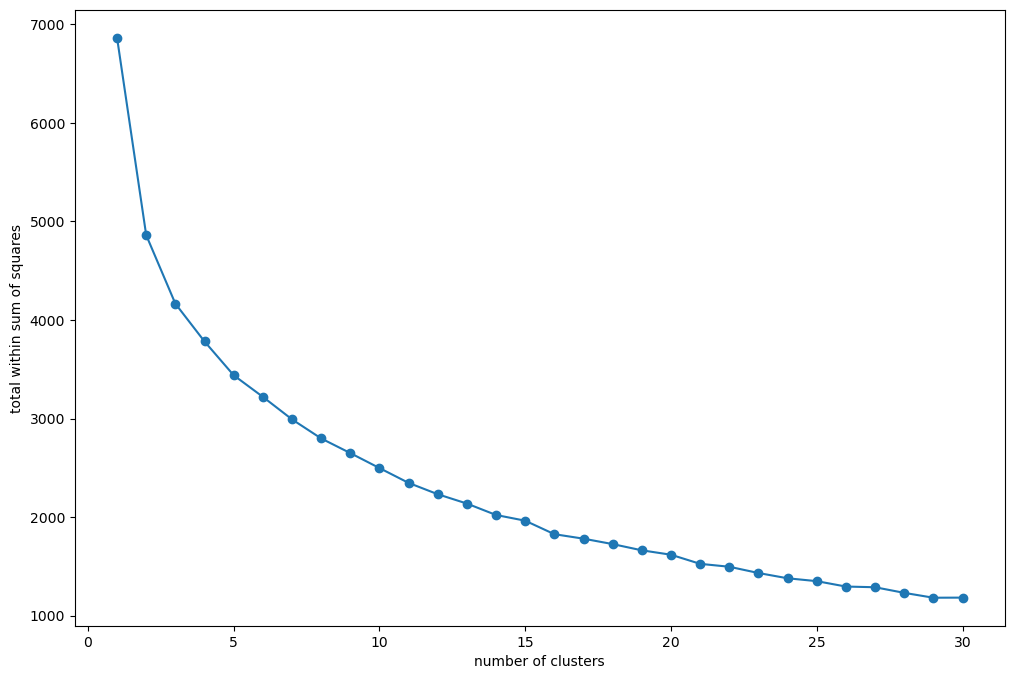

In [124]:
#Visualize the knee bend plot for detrend:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(K, tots_within, 'o-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total within sum of squares')

plt.show()

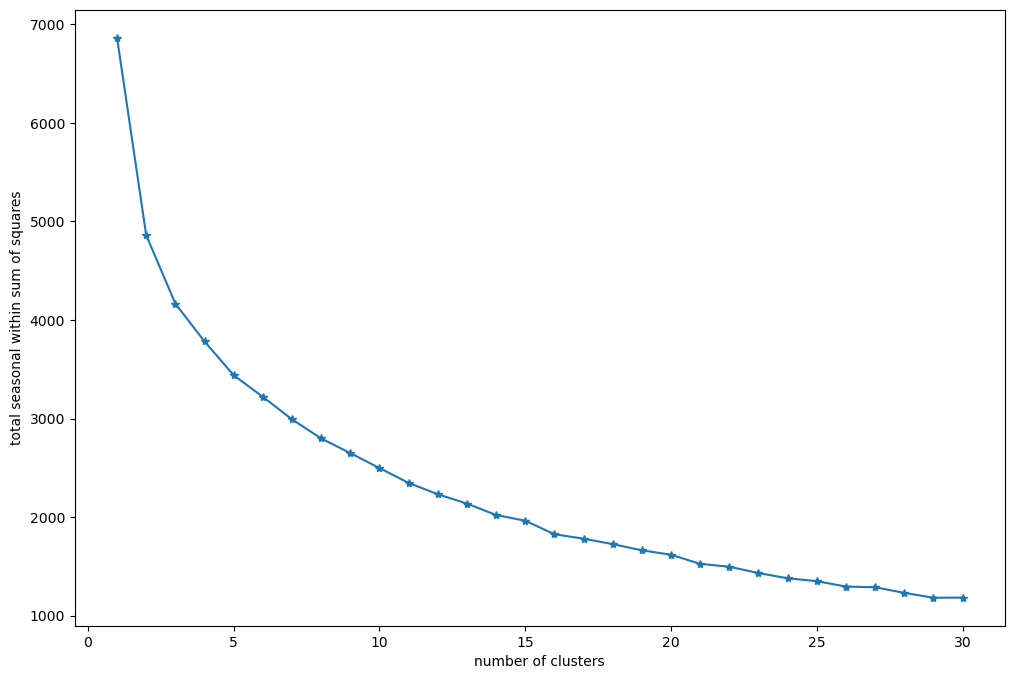

In [125]:
#Visualize the knee bend plot for seasonal:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(KS, tots_within, '*-')
ax.set_xlabel('number of clusters')
ax.set_ylabel('total seasonal within sum of squares')

plt.show()

In [126]:
#Calculating Silhoutte coefficient:
from sklearn.metrics import silhouette_score

In [127]:
sil_coef = []

K = range(2, 31)

for k in K:
    k_label = KMeans(n_clusters=k, random_state=121, n_init=25, max_iter=500).fit_predict( pca_dtrend )
    sil_coef.append( silhouette_score(pca_dtrend, k_label) )

In [128]:
sil_seasonal_coef = []

KSS = range(2, 31)

for kss in KSS:
    ks_label = KMeans(n_clusters=kss, random_state=121, n_init=25, max_iter=500).fit_predict( pca_seasonal )
    sil_seasonal_coef.append( silhouette_score(pca_seasonal, ks_label) )

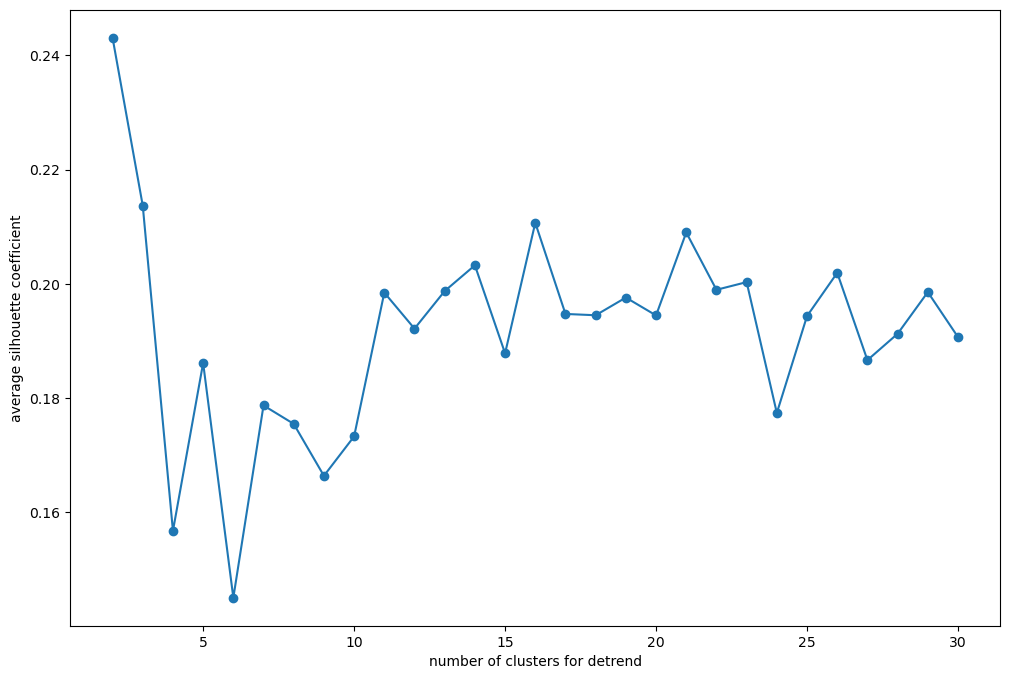

In [129]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(K, sil_coef, 'o-')
ax.set_xlabel('number of clusters for detrend')
ax.set_ylabel('average silhouette coefficient')

plt.show()

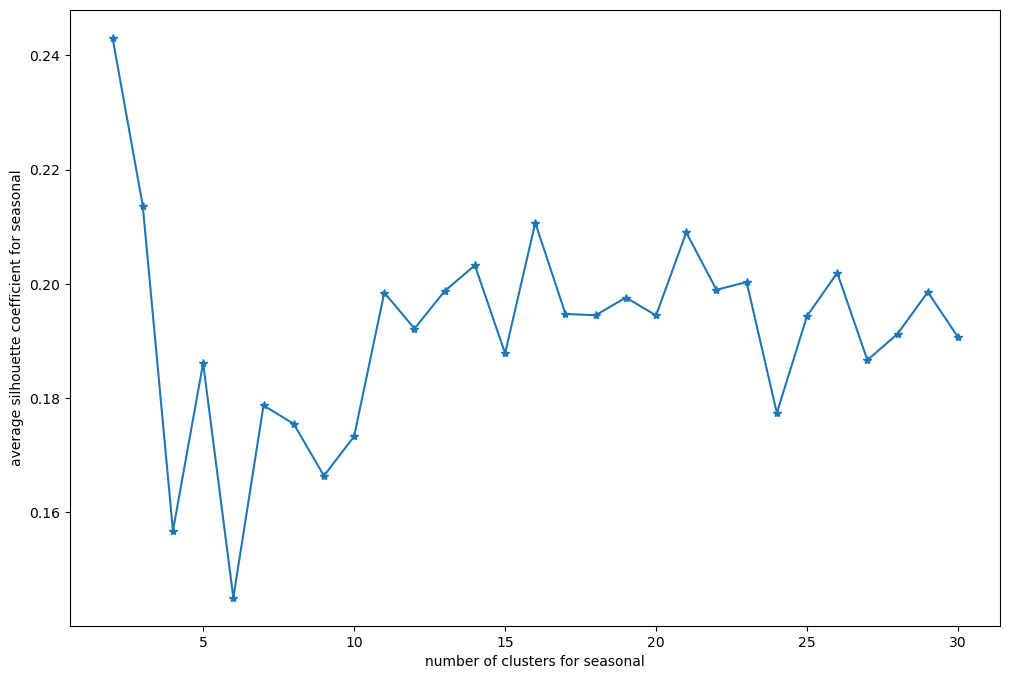

In [130]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(KSS, sil_coef, '*-')
ax.set_xlabel('number of clusters for seasonal')
ax.set_ylabel('average silhouette coefficient for seasonal')

plt.show()

## Hierarchical clustering

In [131]:
from scipy.cluster import hierarchy

### Complete Linkage

In [132]:
hclust_complete = hierarchy.complete( pca_dtrend )

In [133]:
type( hclust_complete )

numpy.ndarray

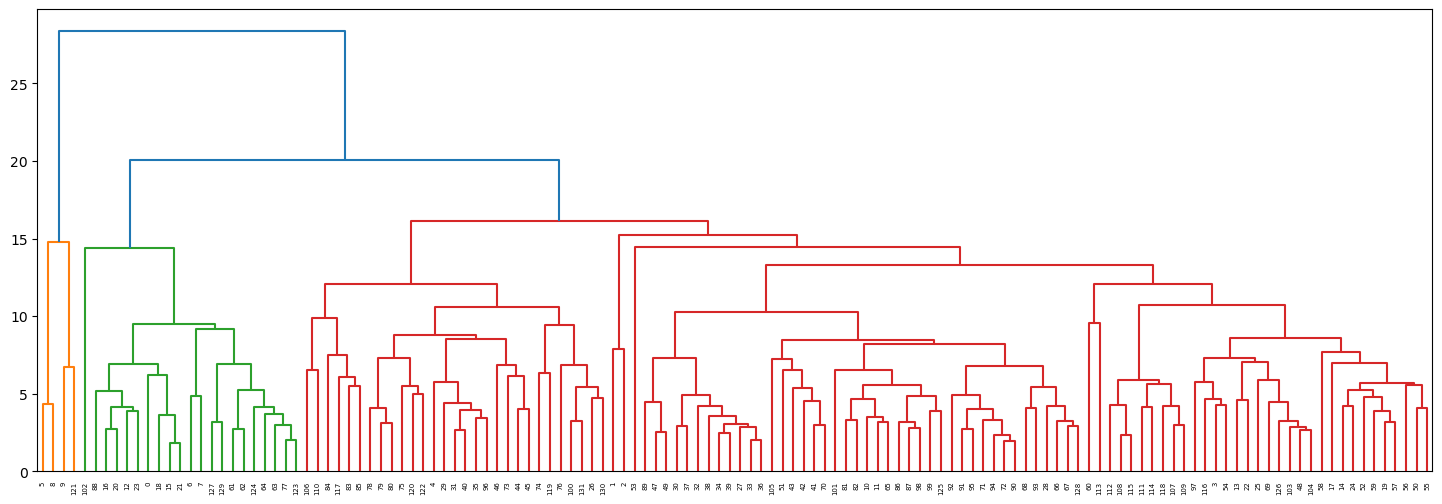

In [134]:
#Visualize the hierarchical results using clustering for detrend
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( hclust_complete )

plt.show()

In [135]:
hclust_seasonal_complete = hierarchy.complete( pca_seasonal )

In [136]:
type( hclust_seasonal_complete )

numpy.ndarray

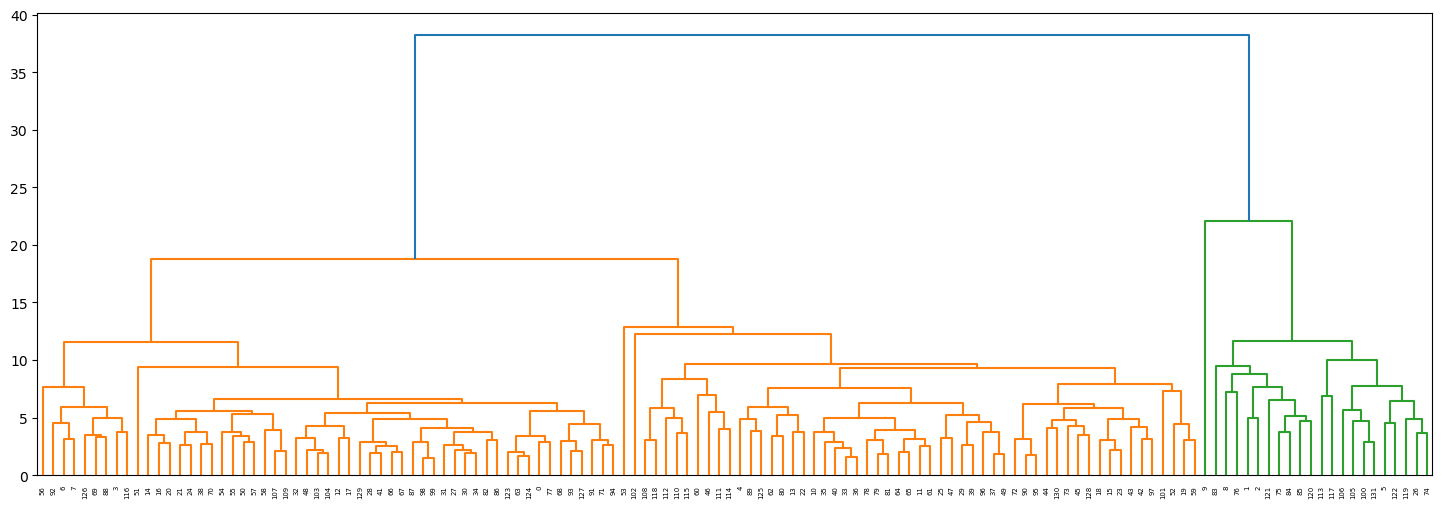

In [137]:
#Visualize the hierarchical results using clustering for seasonal pattern
fig = plt.figure( figsize=(18,6) )

dn = hierarchy.dendrogram( hclust_seasonal_complete )

plt.show()